In [1]:
from src.data_process import Process, stream_topic, topic_corr, topic_word_cloud
# import pyecharts.options as opts
# from pyecharts.charts import ThemeRiver
# import pandas as pd

E:\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\STUDYH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.589 seconds.
Prefix dict has been built succesfully.


In [2]:
process = Process('./config/area.yaml')

原始数据获取。 采用基于 Python 语言编写爬虫，根据关键词和设定的日期，程序共获得26948条微博发博数据,数据项包括发博内容、发布账号、发布时间、点赞数、评论数、收藏数等;

爬取完微博数据后进行数据清洗及数据预处理（代码不在这个文件中）
去除非中文文本、jieba 分词、根据哈工大停用词词典去除通用词、生
成词列表,方便后续借助 BERT 预训练模型进行词嵌入任务。

## 青海

In [3]:
process.set_area('qinghai')

从微博爬取2022年1月1日至1月15日青海省“地震”“疫情”相关数据8740条，以危机四阶段模型为依据,同时参照已有研究对于突发公共卫生事件衍生
舆情的生命周期的划分操作,将其划分为征兆期、爆发期、持续期以及恢复期等 4 个阶段。

### 四阶段划分

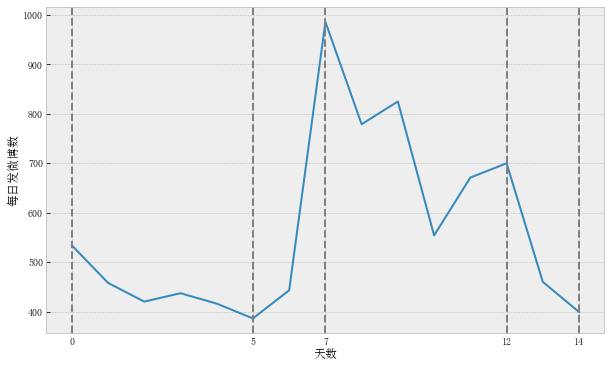

In [4]:
process.date_count_plot()

征兆期的舆情增长相对平缓,对应时段为 2022 年 1 月 1 日至 2022 年 1 月 6 日;
爆发期的舆情增长速度很快,对应时段为 2022 年 1 月 6 日至 2020 年 1 月 8 日,这一阶段的相关微博数量呈爆发式增长,并达到最高水平;
持续期的微博数量相较于爆发期而言呈逐渐减少趋势,对应时段为 2022年1 月 9 日至2022 年1月13日;
恢复期阶段舆情的关注度与信息量都处于较低水平,对应时段为 2022 年 1 月 14 日及之后

### 不同群体主题关联性

In [5]:
topic_corr('./result/qinghai_topic_info_label.csv', './result/qinghai_data.csv')

官方 关注top5:
团结抗疫
知识普及
地震信息发布
逃生技巧
爱心捐赠
--------------------------------------------------
普通用户 关注top5:
团结抗疫
平安希望
抗震救灾
便民热线
地震信息发布
--------------------------------------------------
大V用户 关注top5:
团结抗疫
爱心捐赠
平安希望
抗疫共助
救助捐款
--------------------------------------------------


借助 BERTopic 模型对微博内容进行话题提取。区分官方、普通用户和大v用户，话题提取步骤共计得到29个话题,官方关注前5的话题是团结抗疫、知识普及、地震信息发布、逃生技巧、爱心捐赠；普通用户关注前5的主题是团结抗疫、平安希望、抗震救灾、便民热线、地震信息发布；大v用户关注前5的主题是团结抗疫、爱心捐赠、平安希望、抗疫共助、救助捐款；对模型输出的话题-表征词进行整理,并归纳出二级主题（详见excel表格）

### 主题河流图

In [6]:
stream_topic('./result/qinghai_topic_info_label.csv', './result/qinghai_data.csv')

## 词云图

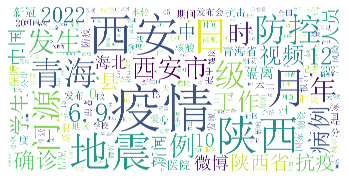

In [7]:
topic_word_cloud('./result/qinghai_topic_info_label.csv', './result/qinghai_data.csv')

## 四川

In [8]:
process.set_area('sichuan')

从微博爬取2022年9月1日至1月29日四川“地震”“疫情”相关数据18208条，以危机四阶段模型为依据,同时参照已有研究对于突发公共卫生事件衍生
舆情的生命周期的划分操作,将其划分为征兆期、爆发期、持续期以及恢复期等 4 个阶段。

### 四阶段划分

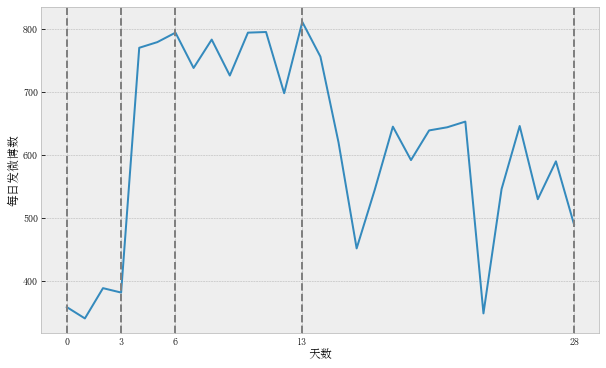

In [9]:
process.date_count_plot()

征兆期的舆情增长相对平缓,对应时段为 2022 年 9 月 1 日至 2022 年 9 月 4 日;
爆发期的舆情增长速度很快,对应时段为 2022 年 9 月 5 日至 2020 年 9 月 7 日,随着9月5日地震的发生，舆论信息在短时间内迅速增长，并维持一定的热度;
持续期的每日相关微博数量相较于爆发期而言稍有增降，在一定时间内，热度并无降低，对应时段为 2022年 9 月 8 日至2022 年 9 月14 日;
恢复期阶段舆情的关注度与信息量都逐渐下降，偶有上升波动,对应时段为 2022 年 9 月 15 日及之后

### 不同群体主题关联性

In [10]:
topic_corr('./result/sichuan_topic_info_label.csv', './result/sichuan_data.csv')

大V用户 关注top5:
疫情防控
变异毒株
疫情信息发布
疫情解封
驰援灾区
--------------------------------------------------
官方 关注top5:
疫情防控
地震信息发布
疫情信息发布
驰援灾区
抗疫短片
--------------------------------------------------
普通用户 关注top5:
疫情防控
疫情解封
变异毒株
遇难信息
地震信息发布
--------------------------------------------------


借助 BERTopic 模型对微博内容进行话题提取。区分官方、普通用户和大v用户，话题提取步骤共计得到32个话题,大v用户关注前5的话题是疫情防控、变异毒株、疫情信息发布、疫情解封、驰援灾区；普通用户关注前5的主题是疫情防控、疫情解封、变异毒株、遇难信息、地震信息发布；官方关注前5的主题是疫情防控、地震信息发布、疫情信息发布、驰援灾区、抗疫短片；对模型输出的话题-表征词进行整理,并归纳出二级主题（详见excel表格）

### 主题河流图

In [11]:
stream_topic('./result/sichuan_topic_info_label.csv', './result/sichuan_data.csv')

## 词云图

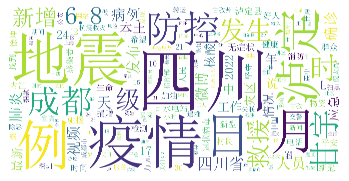

In [12]:
topic_word_cloud('./result/sichuan_topic_info_label.csv', './result/sichuan_data.csv')